### Packages Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.metrics import confusion_matrix,classification_report

from skimage import feature,data,io,measure

In [3]:
import os,random
import itertools
import keras
import PIL
from PIL import Image
from keras import applications
from keras import backend as k
from keras.models import Sequential
from keras.layers import Input,Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator,image_utils
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping

### Datasets

In [4]:
path = 'C:/Users/Nithin/Downloads/Retail Image Classification_AI_CNN/'

In [5]:
train_labels = pd.read_csv(path+'Dataset Labels/train.csv')
test_labels = pd.read_csv(path+'Dataset Labels/test.csv')

In [6]:
train_labels.label.count()

3215

<AxesSubplot:>

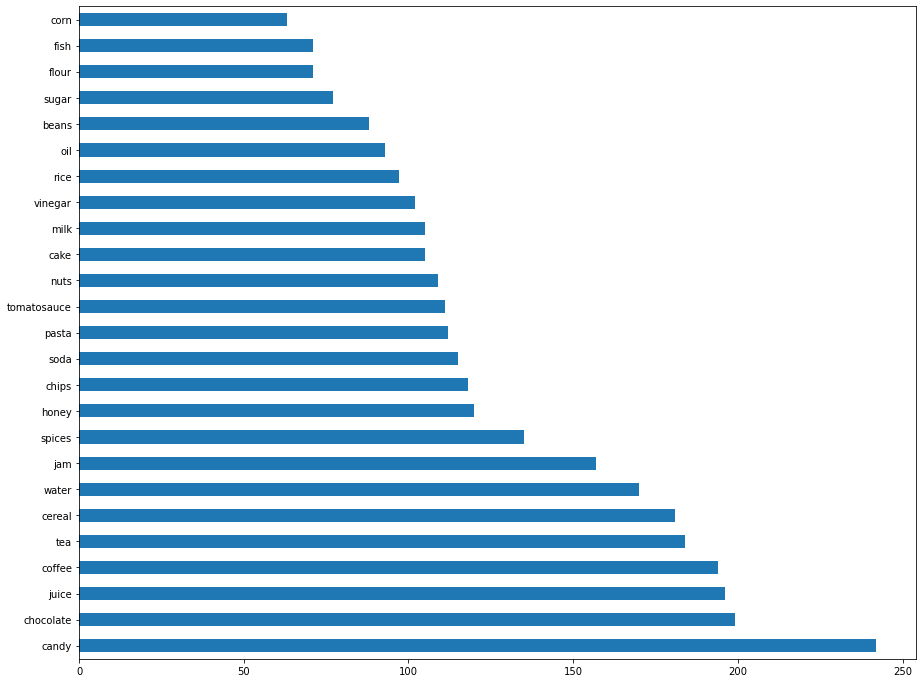

In [7]:
train_labels.label.value_counts().plot(kind='barh',figsize=(15,12))

In [8]:
categories = train_labels.label.unique()

In [9]:
categories

array(['rice', 'candy', 'jam', 'coffee', 'vinegar', 'chocolate', 'sugar',
       'water', 'juice', 'milk', 'soda', 'nuts', 'chips', 'spices',
       'cereal', 'beans', 'cake', 'honey', 'flour', 'pasta',
       'tomatosauce', 'tea', 'corn', 'oil', 'fish'], dtype=object)

In [10]:
train_labels.image_id = train_labels.image_id + '.PNG'

In [11]:
datagen = ImageDataGenerator(data_format = k.image_data_format())

In [12]:
train_img = ImageDataGenerator().flow_from_dataframe(dataframe=train_labels,directory=path+'Datasets/train_img',x_col='image_id',y_col='label',target_size=(224,224),
                                                     class_mode='categorical',shuffle=True)
type(train_img)

Found 3215 validated image filenames belonging to 25 classes.


keras.preprocessing.image.DataFrameIterator

In [13]:
test_labels.image_id = test_labels.image_id + '.PNG'

In [14]:
test_img = ImageDataGenerator().flow_from_dataframe(dataframe=test_labels,directory=path+'Datasets/test_img',x_col='image_id',target_size=(224,224),
                                                     class_mode='input',shuffle=True)
type(test_img)

Found 1732 validated image filenames.


keras.preprocessing.image.DataFrameIterator

In [15]:
#Train
train_imgs,train_labels = next(train_img)
print('images_shape : ',train_imgs.shape)
print('labels_shape : ',train_labels.shape)

images_shape :  (32, 224, 224, 3)
labels_shape :  (32, 25)


In [16]:
#Test
test_imgs,test_labels = next(test_img)
print('images_shape : ',test_imgs.shape)

images_shape :  (32, 224, 224, 3)


### Model Building

**-- Basic Model**

In [17]:
#Input Parameters
batch_size = 643
num_classes = len(categories)
epochs = 5

In [18]:
M0 = Sequential()  # Initialization of network -Inputlayer
M0.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3))) # Convolution layer 1
M0.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))                          #Convolution Layer 2
M0.add(MaxPooling2D(pool_size=(2, 2)))                                             #Pooling layer                                                             
M0.add(Flatten())                                                                  #Flatten Layer
M0.add(Dense(128, activation='relu'))                                              #Fully connected layer                                                           
M0.add(Dense(num_classes, activation='softmax'))  

In [19]:
M0.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
M0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 774400)            0         
                                                                 
 dense (Dense)               (None, 128)               99123328  
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                        

In [37]:
M0.fit(train_img,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/5
101/101 [==============================] - 240s 2s/step - loss: 3.1430 - accuracy: 0.0843
Epoch 2/5
101/101 [==============================] - 238s 2s/step - loss: 3.1160 - accuracy: 0.0918
Epoch 3/5
101/101 [==============================] - 251s 2s/step - loss: 3.0918 - accuracy: 0.0974
Epoch 4/5
101/101 [==============================] - 232s 2s/step - loss: 3.0696 - accuracy: 0.1011
Epoch 5/5
101/101 [==============================] - 181s 2s/step - loss: 3.0286 - accuracy: 0.1039


In [34]:
M0.get_weights()

[array([[[[ 2.20760591e-02, -1.21564366e-01,  8.18468183e-02,
           -8.03568885e-02, -8.57791752e-02, -5.87016717e-02,
            9.37577784e-02, -2.29135458e-03, -4.24983352e-02,
           -8.82295519e-03,  3.08251511e-02,  1.21524416e-01,
           -2.29231026e-02, -1.41927106e-02,  6.54658675e-02,
            5.37292771e-02,  1.23682410e-01,  7.34636420e-03,
           -3.91081721e-02,  1.23580083e-01, -9.11644772e-02,
           -7.70624653e-02,  1.05629936e-01,  8.24491829e-02,
           -1.01737669e-02,  3.55960801e-02, -2.55973800e-03,
           -7.48227984e-02, -7.68951774e-02,  1.15483701e-01,
           -1.25400200e-01,  9.44162831e-02],
          [-1.26739545e-02, -8.67054611e-02, -1.60738993e-02,
           -1.93382353e-02, -6.38898760e-02,  5.95182218e-02,
            1.18694149e-01, -5.34521714e-02, -1.02659665e-01,
            1.07209824e-01,  1.12506464e-01,  1.19576886e-01,
           -5.92690222e-02, -5.62921073e-03, -8.76480490e-02,
           -4.43947576e-

In [38]:
M0.history.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Loss Curves')

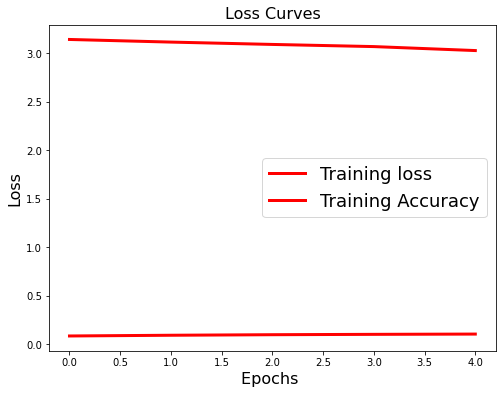

In [39]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(M0.history.history['loss'],'r',linewidth=3.0)
plt.plot(M0.history.history['accuracy'],'r',linewidth=3.0) 
plt.legend(['Training loss', 'Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [40]:
test_pred = M0.predict(test_img)
test_pred=np.argmax(test_pred,axis=1)

55/55 [==============================] - 20s 363ms/step


In [41]:
len(test_pred)

1732

In [42]:
pred = pd.DataFrame(test_pred,columns=['pred_value'])

In [43]:
pred

,pred_value
0,5
1,2
2,10
3,7
4,19
...,...
1727,6
1728,2
1729,2
1730,2


In [44]:
cls = {0 : 'rice',
        1 : 'candy',
        2 : 'jam',
        3 : 'coffee',
        4 : 'vinegar',
        5 : 'chocolate',
        6 : 'sugar',
        7 : 'water',
        8 : 'juice',
        9 : 'milk',
        10 : 'soda',
        11 : 'nuts',
        12 : 'chips',
        13 : 'spices',
        14 : 'cereal',
        15 : 'beans',
        16 : 'cake',
        17 : 'honey',
        18 : 'flour',
        19 : 'pasta',
        20 : 'tomatosauce',
        21 : 'tea',
        22 : 'corn',
        23 : 'oil',
        24 : 'fish'}

In [45]:
pred['class'] = pred.pred_value.apply(lambda x : cls.get(x))

In [46]:
output = pd.read_csv(path+'Dataset Labels/test.csv')

In [47]:
pred

,pred_value,class
0,5,chocolate
1,2,jam
2,10,soda
3,7,water
4,19,pasta
...,...,...
1727,6,sugar
1728,2,jam
1729,2,jam
1730,2,jam


In [48]:
output_M0 = pd.concat([output,pred['class']],axis=1)

**--Transfer Learning**

In [52]:
M_vgg = keras.applications.vgg16.VGG16()
M_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [53]:
M_vgg.layers

In [54]:
M1 = Sequential()
for layer in M_vgg.layers:
    M1.add(layer)

In [55]:
M1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [56]:
for layer in M1.layers:
    layer.trainable = False

In [58]:
M1.add(Dense(25,activation='softmax'))

In [59]:
M1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [60]:
M1.compile(Adam(learning_rate=0.00015),loss=keras.losses.categorical_crossentropy,metrics=keras.metrics.accuracy)

In [61]:
M1.fit(train_img,epochs=5, verbose=1)

Epoch 1/5
101/101 [==============================] - 419s 4s/step - loss: 3.2140 - accuracy: 0.0000e+00
Epoch 2/5
101/101 [==============================] - 401s 4s/step - loss: 3.2065 - accuracy: 0.0000e+00
Epoch 3/5
101/101 [==============================] - 412s 4s/step - loss: 3.1993 - accuracy: 0.0000e+00
Epoch 4/5
101/101 [==============================] - 398s 4s/step - loss: 3.1922 - accuracy: 0.0000e+00
Epoch 5/5
101/101 [==============================] - 414s 4s/step - loss: 3.1852 - accuracy: 0.0000e+00


In [62]:
M1.history.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Loss Curves')

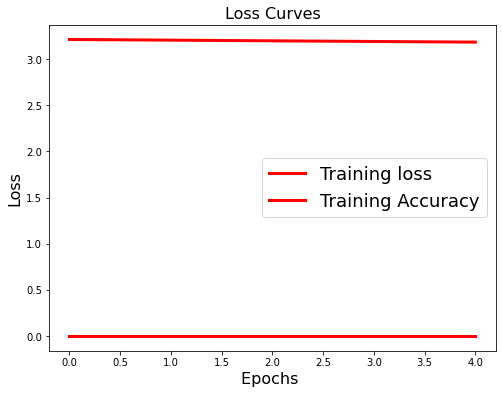

In [63]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(M1.history.history['loss'],'r',linewidth=3.0)
plt.plot(M1.history.history['accuracy'],'r',linewidth=3.0) 
plt.legend(['Training loss', 'Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [64]:
test_pred = M1.predict(test_img)
test_pred=np.argmax(test_pred,axis=1)

55/55 [==============================] - 215s 4s/step


In [65]:
len(test_pred)

1732

In [66]:
pred = pd.DataFrame(test_pred,columns=['pred_value'])

In [67]:
pred

,pred_value
0,12
1,5
2,12
3,6
4,12
...,...
1727,10
1728,12
1729,6
1730,12


In [68]:
cls = {0 : 'rice',
        1 : 'candy',
        2 : 'jam',
        3 : 'coffee',
        4 : 'vinegar',
        5 : 'chocolate',
        6 : 'sugar',
        7 : 'water',
        8 : 'juice',
        9 : 'milk',
        10 : 'soda',
        11 : 'nuts',
        12 : 'chips',
        13 : 'spices',
        14 : 'cereal',
        15 : 'beans',
        16 : 'cake',
        17 : 'honey',
        18 : 'flour',
        19 : 'pasta',
        20 : 'tomatosauce',
        21 : 'tea',
        22 : 'corn',
        23 : 'oil',
        24 : 'fish'}

In [69]:
pred['class'] = pred.pred_value.apply(lambda x : cls.get(x))

In [70]:
output = pd.read_csv(path+'Dataset Labels/test.csv')

In [71]:
pred

,pred_value,class
0,12,chips
1,5,chocolate
2,12,chips
3,6,sugar
4,12,chips
...,...,...
1727,10,soda
1728,12,chips
1729,6,sugar
1730,12,chips


In [72]:
output_M1 = pd.concat([output,pred['class']],axis=1)

### Output Files

In [80]:
output_M0.to_csv(path+'Outputs/M0_Output.csv')
output_M1.to_csv(path+'Outputs/M1_Output.csv')